In [0]:
import sys

if 'google.colab' in sys.modules:
    # Install packages in Colab
    !pip install category_encoders==2.*
    !pip install eli5
    !pip install pandas-profiling==2.*
    !pip install pdpbox
    !pip install shap
    !pip install lime

     |████████████████████████████████| 276kB 2.8MB/s 
     |████████████████████████████████| 2.0MB 32.1MB/s 
  Created wheel for lime: filename=lime-0.2.0.0-cp36-none-any.whl size=284181 sha256=6fd61a475e09774200875f9b0072dba6ea1ad7d6f94a5e20ee111bb9a47b3163
  Stored in directory: /root/.cache/pip/wheels/22/f2/ec/e5ebd07348b2b1ac722e91c2f549fcc220f7d5f25497a61232
Successfully built lime
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: Pillow 7.0.0
    Uninstalling Pillow-7.0.0:
      Successfully uninstalled Pillow-7.0.0


In [0]:
import pandas as pd
df = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data")


In [0]:
col_names= ['symboling', 'normalized-losses','make', 'fuel-type', 'aspiration',  'num-of-doors',
            'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height',
            'curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']
df.columns = col_names

In [0]:
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
5,1,158,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
6,1,?,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
7,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
8,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?
9,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,176.8,64.8,54.3,2395,ohc,four,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430


In [0]:
import pandas as pd
import numpy as np

df = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data")

col_names= ['symboling', 'normalized-losses','make', 'fuel-type', 'aspiration',  'num-of-doors',
            'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height',
            'curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system','bore','stroke','compression-ratio','horsepower','peak-rpm','citympg','highwaympg','price']
df.columns = col_names

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer



df["citympg"] = pd.to_numeric(df.citympg, errors='coerce')
df["citympg"] = df.citympg.astype(float)

#Replace all ? to nan 
df[col_names] = df[col_names].replace({'?':np.nan})

# Replace pricae where there is no value to to mean value 
df["price"] = df.price.astype(float)
df['price'].fillna(df['price'].mean(), inplace = True)

df['num-of-doors'].fillna('4', inplace = True)
df["num-of-doors"].replace({"two": "2", "four": "4"}, inplace=True)
df['num-of-doors'] = df['num-of-doors'].astype('int8')

df['num-of-cylinders'].fillna('4', inplace = True)
df["num-of-cylinders"].replace({"two": "2", "four": "4", "five" :"5", "three":"3", "six" :"6", "eight":"8", "twelve":"12" }, inplace=True)
df['num-of-cylinders'] = df['num-of-cylinders'].astype('int8')


target = 'price'

# train, testand validate split
train, test = train_test_split(df, test_size=0.2)
train, validate = train_test_split(train, test_size=0.2)

print('Test Size=', len(test))
print('Validate Size=', len(validate))
print('Train Size=', len(train))

# #getting the baseline
y_train = train[target]
y_validate = validate[target]
baseline = y_train.value_counts()

# features_to_drop = [target, 'symboling', 'make', 'normalized-losses']
# features = train.columns.drop(features_to_drop)

# cardinality = train.select_dtypes(exclude='number').nunique()
# low_cardinality_features = cardinality[cardinality <= 50].index.drop(features_to_drop, errors='ignore').tolist()
# print ('low cardinality features', low_cardinality_features)

all_features= ['num-of-doors', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'num-of-cylinders','engine-size','bore','stroke','compression-ratio','horsepower','peak-rpm','citympg','highwaympg']

features = ['num-of-doors', 'num-of-cylinders', 'citympg']


x_train = train[features]
x_val   = validate[features]
x_test  = test[features]

y_train = train[target]
y_val   = validate[target]
y_test  = test[target]

linear_reg = LinearRegression()

imputer = SimpleImputer()
x_train_imputed = imputer.fit_transform(x_train)
x_val_imputed = imputer.fit_transform(x_val)

linear_reg.fit(x_train_imputed, y_train)
linear_reg.predict(x_train_imputed)

test_case = [[4, 12, 25]]
print(linear_reg.predict(test_case)
)

Test Size= 41
Validate Size= 33
Train Size= 130
[39203.53212302]


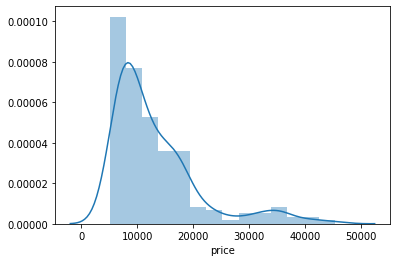

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(df[target])





In [0]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer()
x_train_imputed = imputer.fit_transform(x_train)
x_val_imputed = imputer.fit_transform(x_val)
x_test_imputed = imputer.fit_transform(x_test)



In [0]:
from sklearn.metrics import mean_absolute_error

y_pred_train = linear_reg.predict(x_train_imputed)
mae = mean_absolute_error(y_train, y_pred_train)
print(f'Train Error: ${mae:.0f}')

Train Error: $3180


In [0]:
from sklearn.metrics import mean_absolute_error

y_pred_val = linear_reg.predict(x_val_imputed)
mae = mean_absolute_error(y_val, y_pred_val)
print(f'Val Error: ${mae:.0f}')

Val Error: $4624


In [0]:
from sklearn.metrics import mean_absolute_error

y_pred_test = linear_reg.predict(x_test_imputed)
mae = mean_absolute_error(y_test, y_pred_test)
print(f'Test Error: ${mae:.0f}')

Test Error: $3366


In [0]:
from sklearn.metrics import r2_score
r2 = r2_score(y_train, y_pred_train)
print('R^2:', r2)


R^2: 0.6803897444390236


In [0]:
from sklearn.metrics import r2_score
r2 = r2_score(y_val, y_pred_val)
print('R^2:', r2)


R^2: 0.5888530447194149


In [0]:
from sklearn.metrics import mean_absolute_error, r2_score
r2 = r2_score(y_test, y_pred_test)
print('R^2:', r2)


R^2: 0.3775318021597549


In [0]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_regression, f_classif
from sklearn import utils
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor

lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(y_train)
# print(training_scores_encoded)
# print(utils.multiclass.type_of_target(y_train))
# print(utils.multiclass.type_of_target(y_train.astype('int')))
# print(utils.multiclass.type_of_target(training_scores_encoded))



def make_pipeline_from_features(features):

    pipeline = make_pipeline(
        ce.OrdinalEncoder(), 
        SimpleImputer(strategy='median'),
        DecisionTreeRegressor(min_samples_split=80,
        max_features="auto", random_state=66666, 
        max_depth=5) 
        # RandomForestClassifier(n_estimators=500, max_depth=10)
    )

    pipeline.fit(x_train, y_train)

    return pipeline

features = ['num-of-doors', 'num-of-cylinders', 'citympg']

pipeline = make_pipeline_from_features(all_features)

print(pipeline.score(x_val, y_val))

0.5346073802000962


In [0]:
accuracy_val = pipeline.score(x_val, y_val)
print(f'accuracy: {accuracy_val * 100:.2f}%')

accuracy: 53.46%


In [0]:
y_pred_test_dt = pipeline.predict(x_test_imputed)
mae = mean_absolute_error(y_test, y_pred_test_dt)
print(f'Test Error DT: ${mae:.0f}')

Test Error DT: $2868


In [0]:
y_pred_train_dt = linear_reg.predict(x_train_imputed)
mae = mean_absolute_error(y_train, y_pred_train_dt)
print(f'Train Error DT: ${mae:.0f}')

Train Error DT: $3929


In [0]:
from sklearn.metrics import r2_score
r2 = r2_score(y_train, y_pred_train_dt)
print('R^2:', r2)


R^2: 0.5696792967150093


In [0]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred_test_dt)
print('R^2:', r2)


R^2: 0.7328905649412794


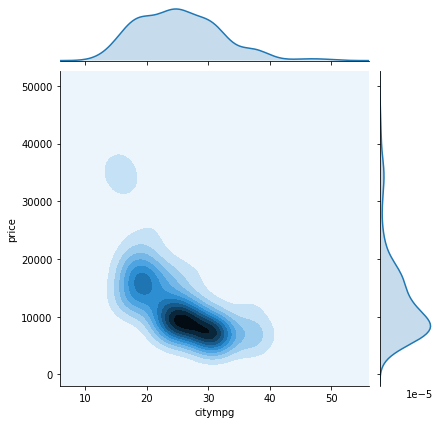

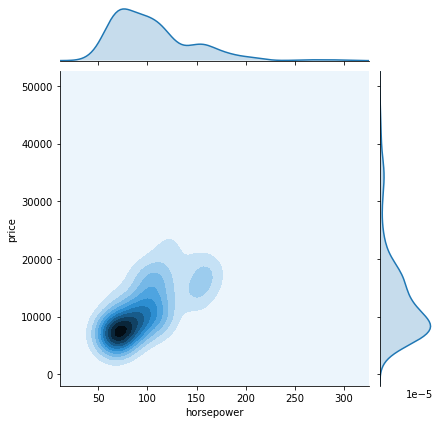

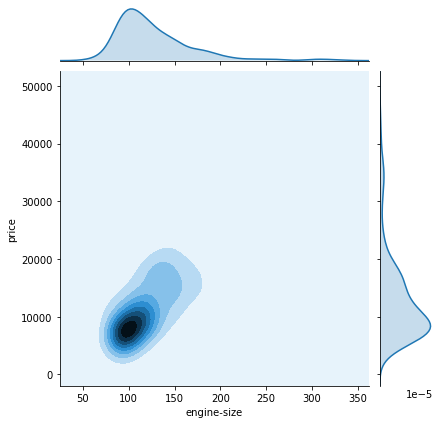

In [0]:


import seaborn as sns
import matplotlib.pyplot as plt

sns.jointplot("citympg", "price", data=df, kind='kde')
sns.jointplot("horsepower", "price", data=df, kind='kde')
sns.jointplot("engine-size", "price", data=df, kind='kde')



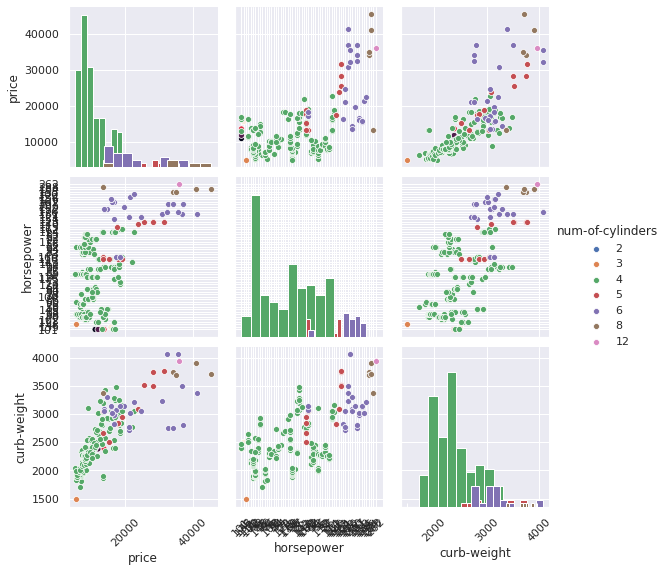

In [0]:
import seaborn as sns

sns.set()

g = sns.pairplot(df[["price", "horsepower", "curb-weight", "num-of-cylinders"]], hue="num-of-cylinders", diag_kind="hist")
 
for ax in g.axes.flat: 
    plt.setp(ax.get_xticklabels(), rotation=45)

In [0]:
import lime
import lime.lime_tabular
import shap
import xgboost as xgb
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D
from sklearn.neighbors import KNeighborsRegressor
import seaborn as sns
import time
%matplotlib inline

import warnings; warnings.simplefilter('ignore')

 

# K Nearest Neighbor
knn = KNeighborsRegressor()
knn.fit(x_train, y_train)
 
# Create the SHAP Explainers
# SHAP has the following explainers: deep, gradient, kernel, linear, tree, sampling
# Must use Kernel method on knn
# Summarizing the data with k-Means is a trick to speed up the processing
 
 
# build the kmeans summary
x_train_summary = shap.kmeans(x_train, 10)
 
# using the kmeans summary
t0 = time.time()
explainerKNN = shap.KernelExplainer(knn.predict,x_train_summary)
shap_values_KNN_test = explainerKNN.shap_values(x_test)
t1 = time.time()
timeit=t1-t0
timeit
shap.initjs()
# now we can plot the SHAP explainer
shap.force_plot(explainerKNN.expected_value, shap_values_KNN_test[10], x_test.iloc[[10]])